<a href="https://colab.research.google.com/github/Carla9711/Prediction-of-Product-Sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Carla Cloete

##Project Overview

##Load and Inspect Data

##### Questions to answer:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd

In [3]:
# Save filepath and load data
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# How many rows and columns
df_sales.shape

(8523, 12)

- There are 8523 rows and 12 columns

In [7]:
# Datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- There are 5 numeric columns and 7 string columns

##Clean Data

In [8]:
# check for duplicates
df_sales.duplicated().sum()

0

- There are no duplicates

In [9]:
# check nulls
col_nulls = df_sales.isna().sum()
col_nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# null percentages
col_nulls/len(df_sales)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

- There are two columns with null values
  - Item_Weight (17% of values are null)
  - Outlet_Size (28% of values are null)



In [11]:
# replace missing columns
# replace Item_Weight missing values with -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [12]:
# check value counts of Item_Weight
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

- The 1463 missing values have been replaced by -1

In [13]:
# replace Outlet_Size missing values with 'MISSING'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [14]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- The 2410 missing values hve been replaced with MISSING

In [15]:
# find and fix inconsistent categories of data
# check value counts of category columns
# create list of category columns
cat_col = df_sales.select_dtypes('object').columns
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
# loop through list of columns and check value counts for each column
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_sales[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- The Item_Fat_Content column has inconsistent values
    - LF should be replaced with Low Fat
    - reg should be replaces with Regular
    - low fat should be replaced with Low Fat

In [17]:
# replace inconsistent columns in Item_Fat_Content
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                     'reg':'Regular',
                                                                     'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:
*   Histograms to view the distributions of numerical features in your dataset.
*   Boxplots to view statistical summaries of numerical features in your dataset.
*   Countplots to view the frequency of each class of categorial features in your dataset.
*   Heatmap to view the correlation between features.









In [25]:
# import data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# check data
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [53]:
# find list of numeric columns
col_num = df_sales.select_dtypes('number')
col_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


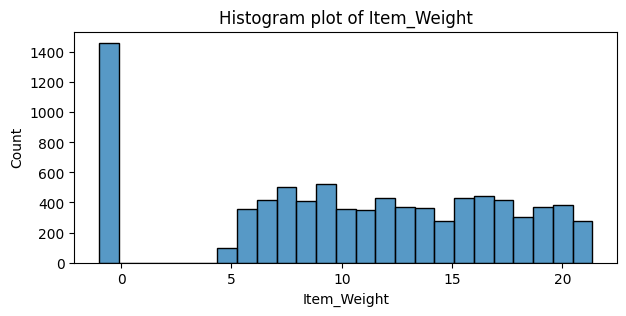

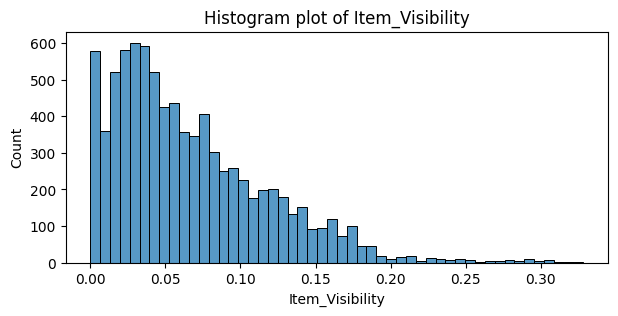

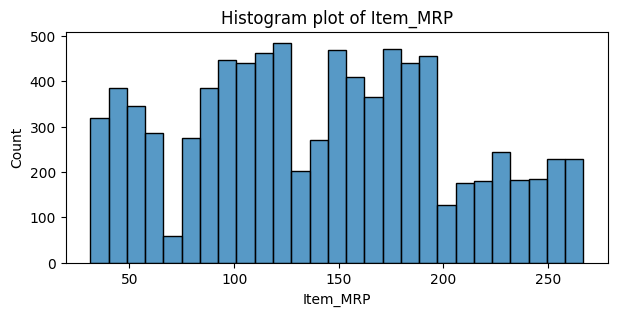

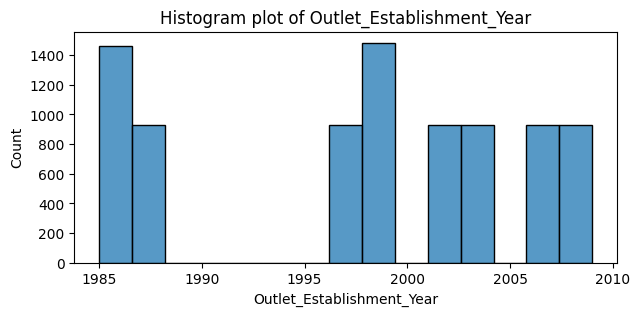

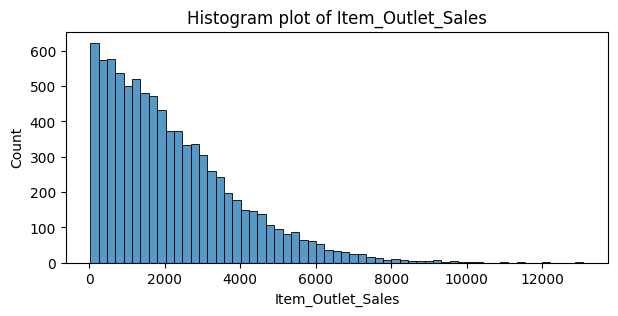

In [91]:
# Histogram plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.histplot(x=col, data=col_num)
    ax.set_title(f"Histogram plot of {col}")

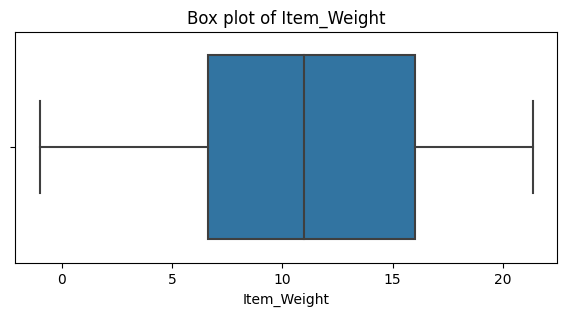

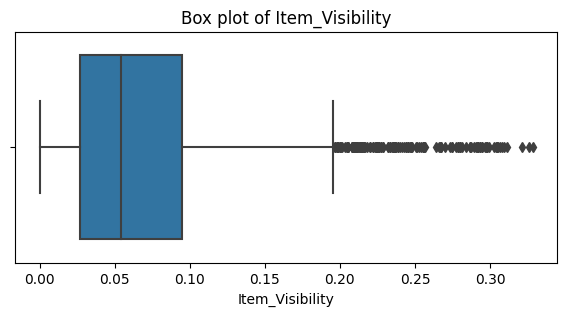

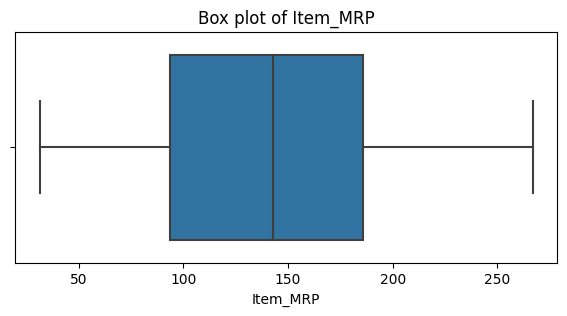

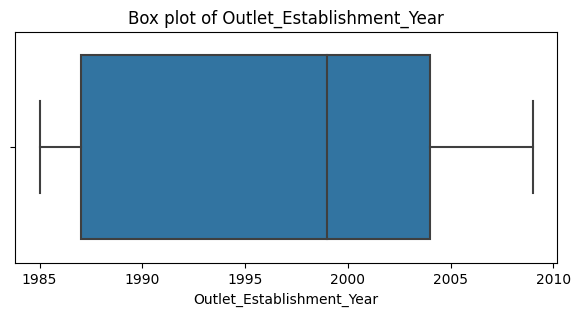

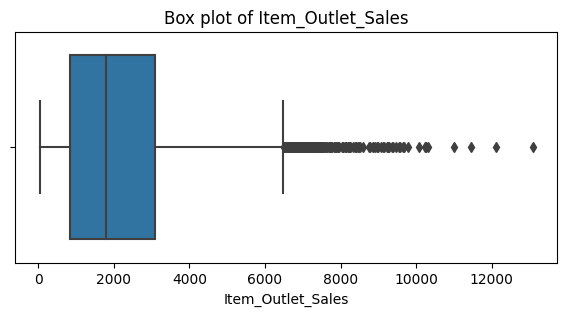

In [90]:
# Box plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.boxplot(x=col, data=col_num)
    ax.set_title(f"Box plot of {col}")

In [74]:
# find list of cat columns
col_cat = df_sales.select_dtypes('object')
col_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [75]:
# drop Item_Identifier
col_cat = col_cat.drop(columns='Item_Identifier')
col_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


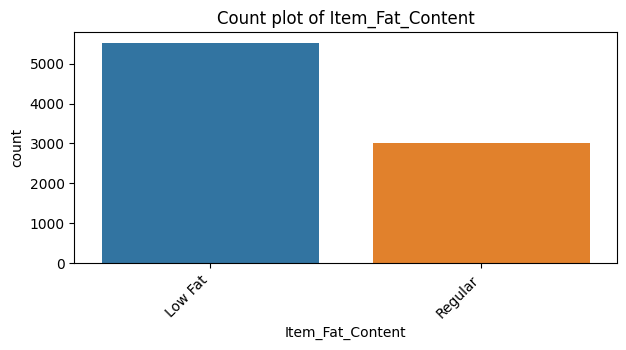

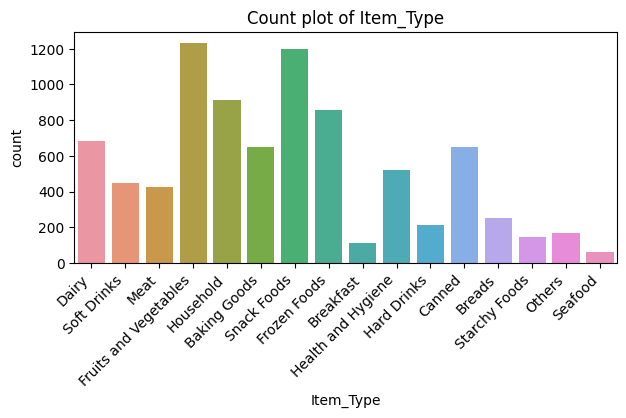

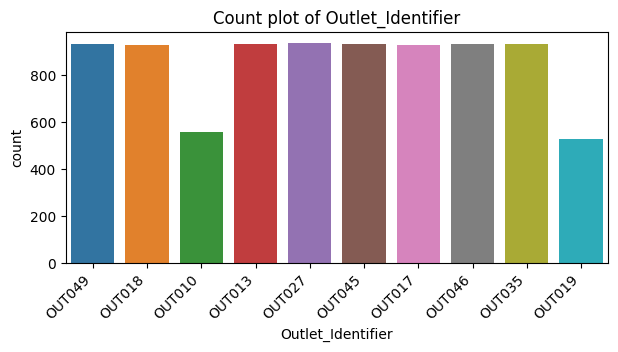

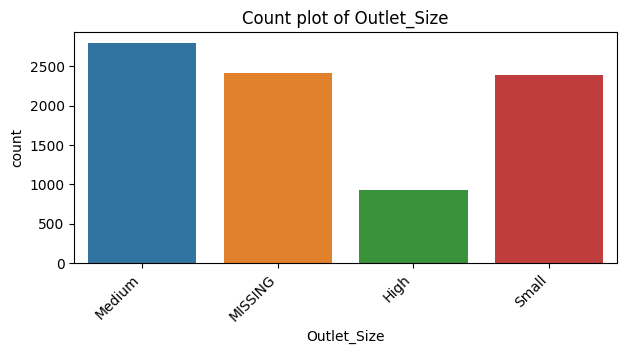

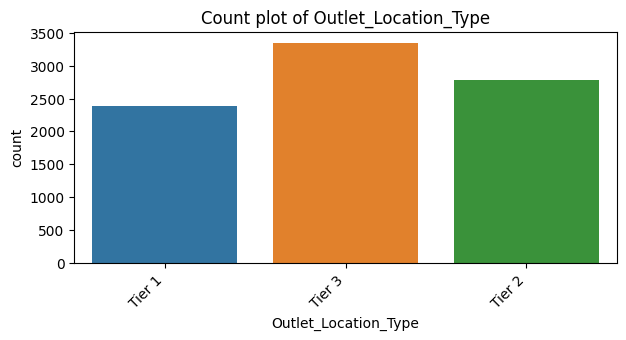

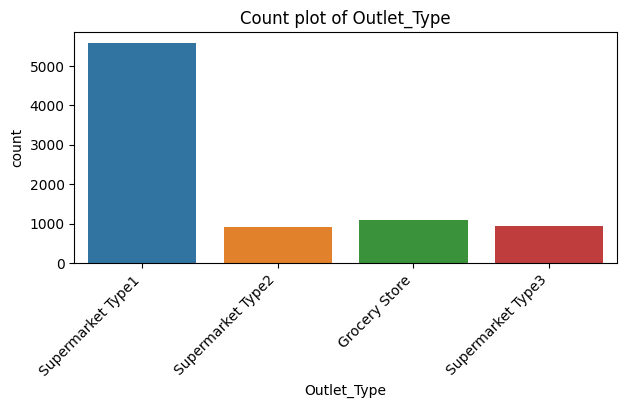

In [86]:
# Count plot of all categorical columns
for i, col in enumerate(col_cat.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.countplot(x=col, data=col_cat)
    ax.set_title(f"Count plot of {col}")
    #ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [27]:
# Find correlations
corr = df_sales.corr(numeric_only=True)

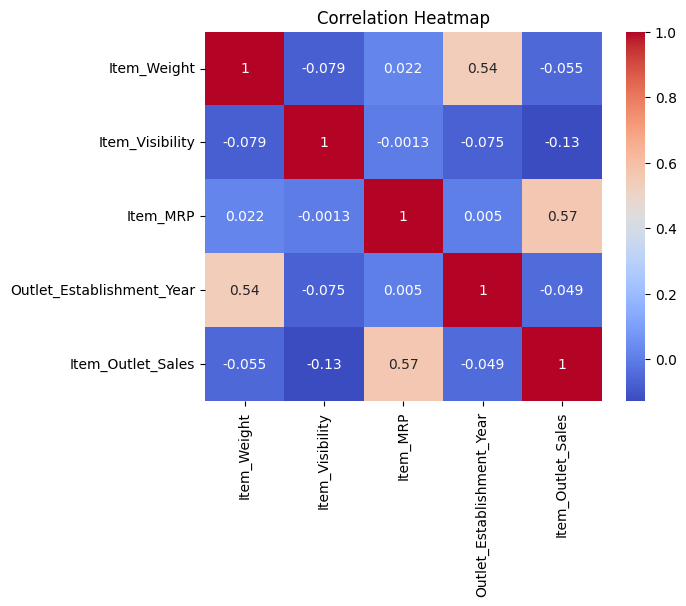

In [28]:
# Heatmap to view correlations
ax = sns.heatmap(corr,annot=True, cmap='coolwarm')
ax.set(title='Correlation Heatmap');

##Feature Inspection